In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
from cassandra.cluster import Cluster
cluster = Cluster(protocol_version=3)
session = cluster.connect()
session.set_keyspace('titanicdata') 
Query = 'Select Fare,Pclass,Age,Sex,Survived From TitanicFinal'
row = session.execute(Query)
data = pd.DataFrame(row[:],columns=['Fare','Pclass','Age','Sex','Survived'])
data

,Fare,Pclass,Age,Sex,Survived
0,8.029200,3,15.0,1,1
1,9.825000,3,20.0,1,0
2,76.729202,1,49.0,1,1
3,24.150000,3,28.0,1,1
4,8.050000,3,29.0,0,0
5,7.141700,3,24.0,0,1
6,16.100000,3,24.0,0,0
7,12.475000,3,5.0,1,1
8,56.929199,1,30.0,1,1
9,13.000000,2,39.0,0,0


In [11]:
imputed_features = data.ix[:,['Fare','Pclass','Age','Sex']]
target = data.ix[:,'Survived'].values

In [12]:
features_array = imputed_features.values
features_array

array([[  8.0291996 ,   3.        ,  15.        ,   1.        ],
       [  9.82499981,   3.        ,  20.        ,   1.        ],
       [ 76.72920227,   1.        ,  49.        ,   1.        ],
       ..., 
       [ 24.        ,   2.        ,  30.        ,   0.        ],
       [ 24.14999962,   3.        ,  30.        ,   1.        ],
       [ 77.28749847,   1.        ,  21.        ,   0.        ]])

In [13]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [15]:
target_predicted = logreg.predict(features_test)
target_predicted

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.71851851851851856

In [51]:
print 'The Number of Passangers Survived in test DataSet',sum(target_predicted == 1),' The Number of Passengers Passed away ',sum(target_predicted == 0)

The Number of Passangers Survived in test DataSet 66  The Number of Passengers Passed away  69


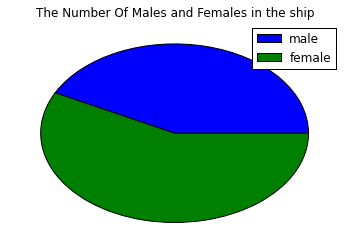

In [52]:
import numpy as np
p=np.array([len(data.ix[data['Sex']==1,:]),len(data.ix[data['Sex']==0,:])])
plt.pie(p)
plt.legend(['male','female'])
plt.title('The Number Of Males and Females in the ship')